In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from io import StringIO
import graphviz
import numpy as np

In [2]:
data = pd.read_csv('../data/g/data.csv')

In [3]:
level = 1 # max 6

In [21]:
data.tail(15)

,RTG,Radius,os trapeziodeum (2),os trapezium (1),Distal phalang of fifth finger,Visible carpal bones,os lunatum (6),groups
14,5_0_g,6,3,2,4,7,4,6
15,5_6_g,6,3,3,4,7,4,6
16,6_0_g,6,3,3,4,7,4,6
17,7_0_g,6,4,4,5,7,4,7
18,8_0_g,7,4,4,5,7,5,7
19,9_0_g,7,4,4,5,7,5,7
20,10_0_g,7,5,5,6,7,6,8
21,11_0_g,7,5,5,6,7,6,8
22,12_0_g,8,6,6,7,7,6,8
23,13_0_g,8,7,6,7,7,6,9


In [5]:
X = data.values[:, 1:level+1].astype('float64')  # Vezmeme imformace o kostech a pregenerujeme na floaty

In [6]:
X

array([[ 1.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 5.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 7.],
       [ 7.],
       [ 7.],
       [ 7.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 9.],
       [ 9.],
       [ 9.],
       [ 9.]])

In [7]:
Y = data.values[:, -1].astype('float64')  # Totez pro informace o vysledne skupine

In [8]:
Y

array([  1.,   1.,   1.,   2.,   2.,   2.,   3.,   3.,   4.,   4.,   4.,
         5.,   6.,   6.,   6.,   6.,   6.,   7.,   7.,   7.,   8.,   8.,
         8.,   9.,   9.,   9.,  10.,  10.,  10.])

In [20]:
groups = []
l = list(Y)
for x in set(Y):
    x = int(x)
    groups.append(l.count(x))
    print(x)
groups

1
2
3
4
5
6
7
8
9
10


[3, 3, 2, 3, 1, 5, 3, 3, 3, 3]

In [9]:
clf = DecisionTreeClassifier(min_samples_split=5)
dt = clf.fit(X, Y)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
out = StringIO()
export_graphviz(clf, out_file=out, feature_names=data.columns[1:level+1])

In [11]:
g = graphviz.Source(out.getvalue())

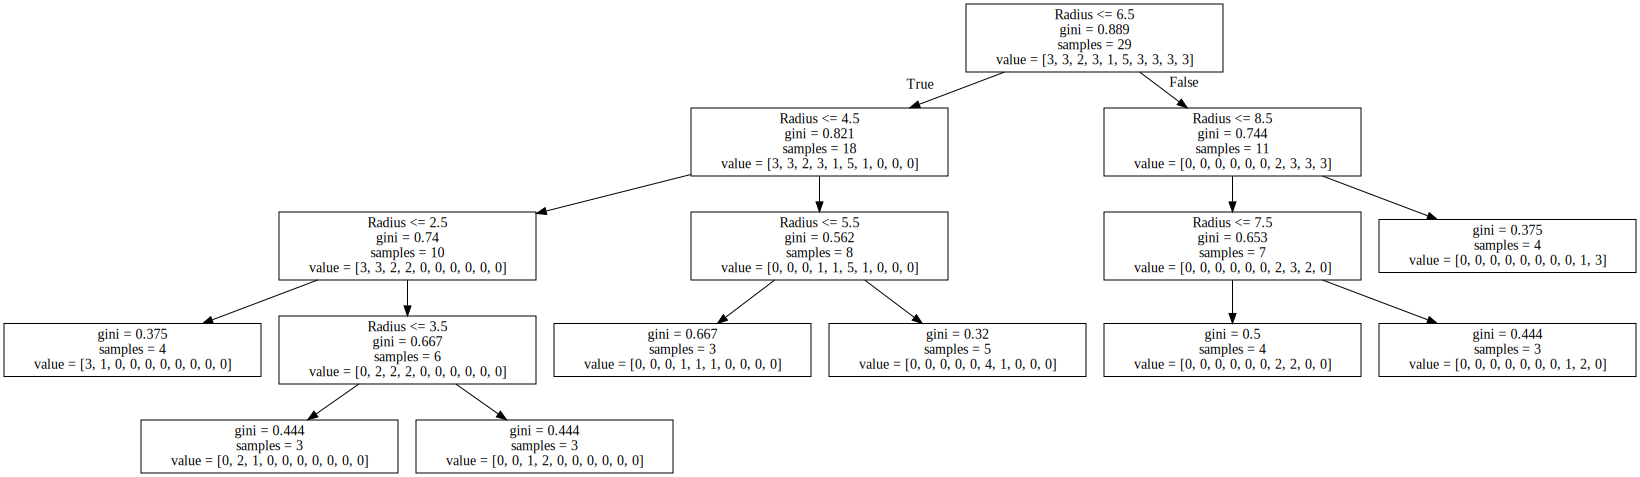

In [12]:
g

In [15]:
dt.predict(np.array([[0]]))

array([ 1.])